<a id=0></a>
# 10.Classification models
※　分類の機械学習モデル

---
### [1. 探索的データ分析（EDA）、スケーリング](#1)
### [2. Random Forest Classifier](#2)
### [3. KNeighbors Classifier](#3)
### [4. SVC](#4)
### [5. Logistic Regression](#5)
### [6. モデルの評価](#6)
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(context='talk', style='darkgrid')
import japanize_matplotlib

---
<a id=1></a>
[Topへ](#0)

---
## 1. 探索的データ分析（EDA)、スケーリング

* 乳がんデータセット
* 相関関係
* 分布、外れ値などの確認
* スケーリング
---

乳がんデータセット

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
breast_cancer = load_breast_cancer()

In [4]:
breast_cancer['data']

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [5]:
breast_cancer['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [6]:
df_X = pd.DataFrame(breast_cancer['data'], columns=breast_cancer['feature_names'])
df_X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
df_y = pd.DataFrame(breast_cancer['target'], columns=['target'])
df_y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [8]:
df_X.shape, df_y.shape

((569, 30), (569, 1))

In [9]:
df = pd.concat([df_X, df_y], axis=1)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [10]:
df.shape

(569, 31)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

相関関係

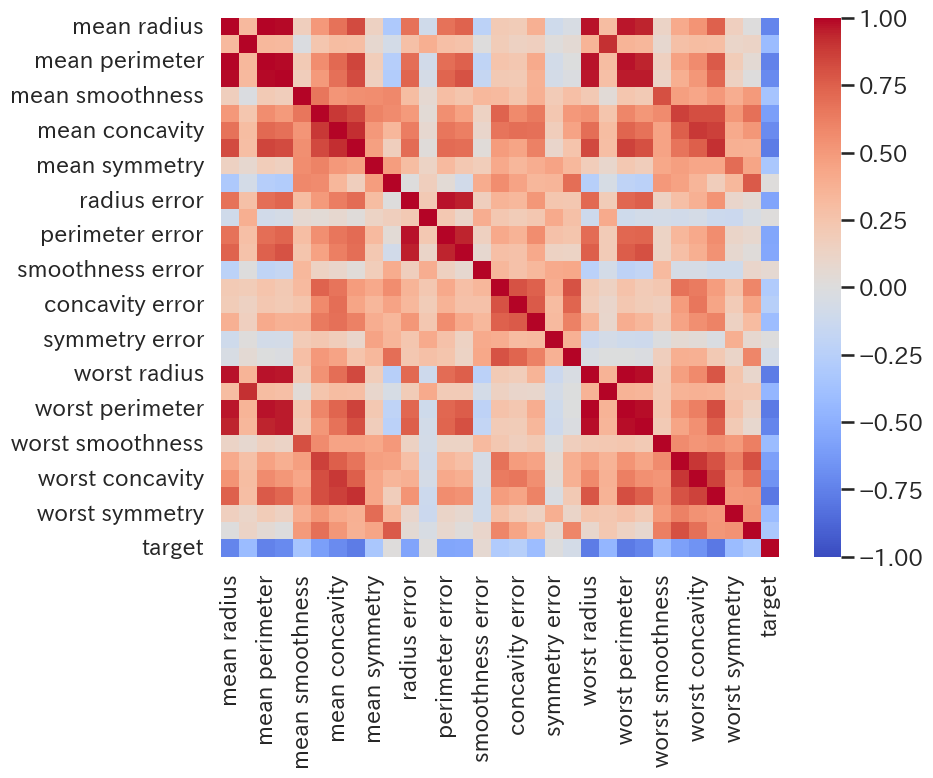

In [12]:
plt.figure(figsize=(9, 7))
sns.heatmap(df.corr(), vmax=1, vmin=-1, center=0, cmap='coolwarm');

In [13]:
df.columns.str.contains('mean|target')

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True])

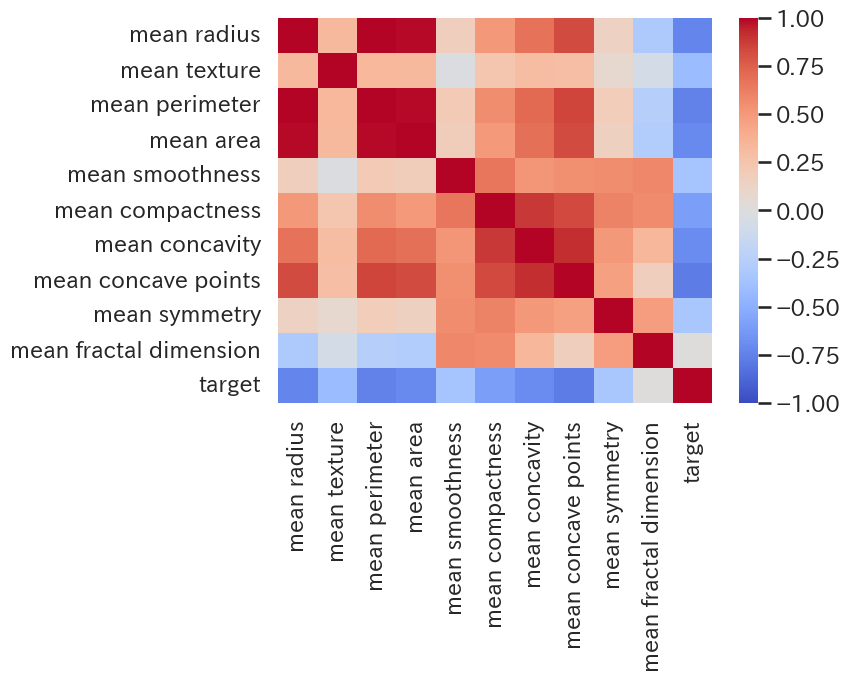

In [14]:
plt.figure(figsize=(7, 5))
sns.heatmap(df.iloc[:, df.columns.str.contains('mean|target')].corr(), vmax=1, vmin=-1, center=0, cmap='coolwarm');

In [15]:
print(breast_cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

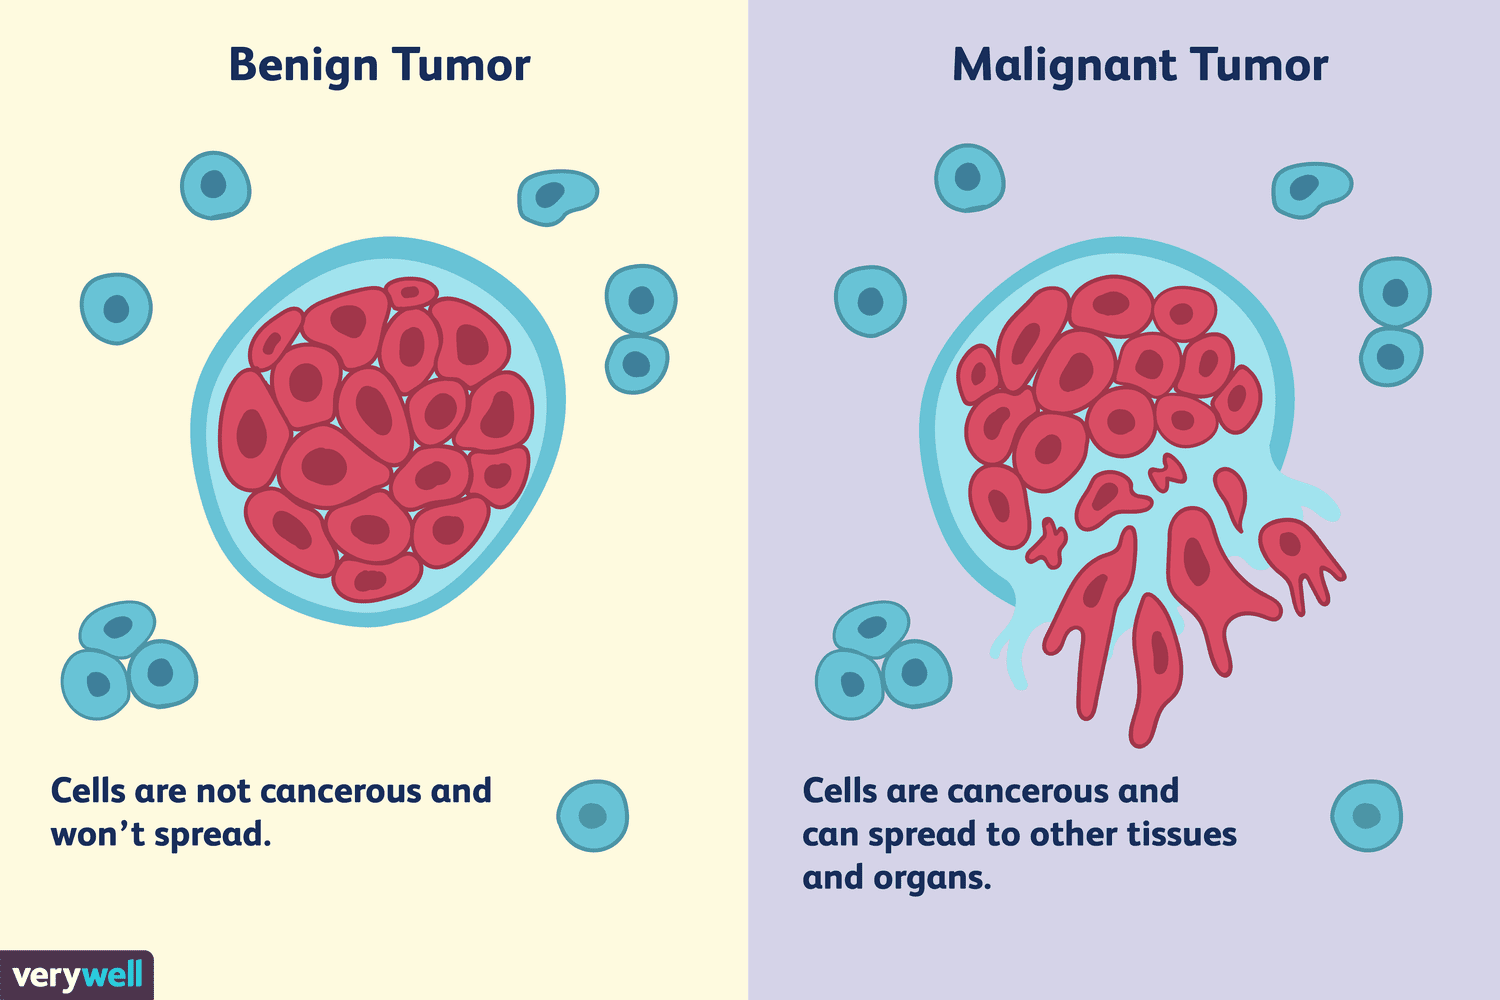

In [16]:
df['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

target = 0 -> Malignant -> Cancerous<br>
target = 1 -> Benign -> not Cancerous

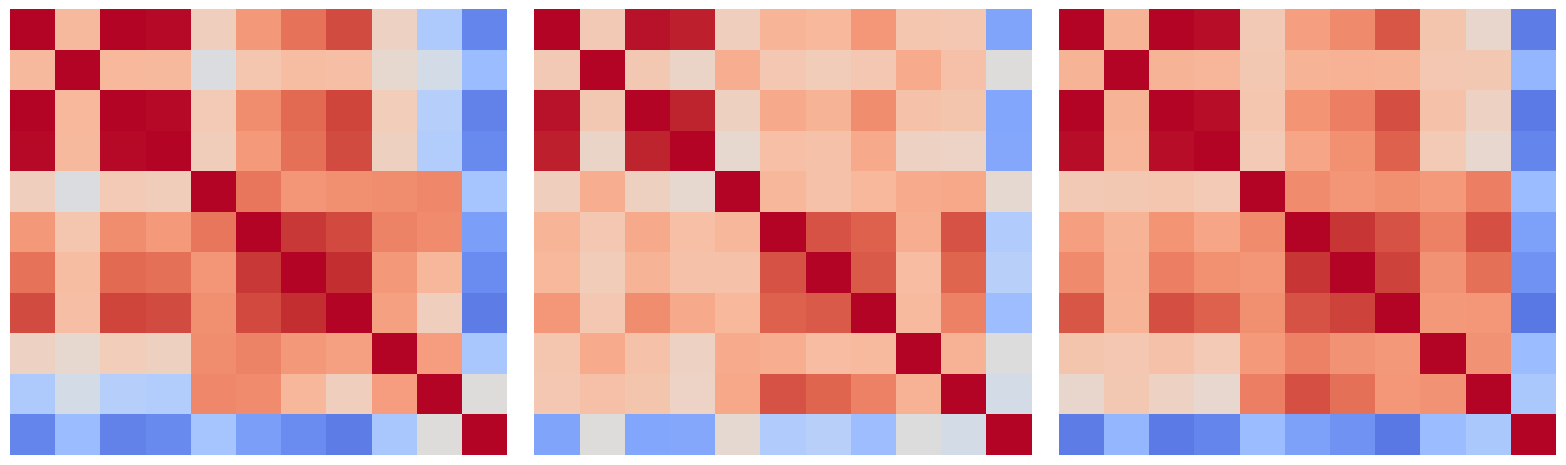

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5), tight_layout=True)
sns.heatmap(df.iloc[:, df.columns.str.contains('mean|target')].corr(), vmax=1, vmin=-1, center=0, cmap='coolwarm', xticklabels=False, yticklabels=False, cbar=False, ax=axes[0])
sns.heatmap(df.iloc[:, df.columns.str.contains('error|target')].corr(), vmax=1, vmin=-1, center=0, cmap='coolwarm', xticklabels=False, yticklabels=False, cbar=False, ax=axes[1])
sns.heatmap(df.iloc[:, df.columns.str.contains('worst|target')].corr(), vmax=1, vmin=-1, center=0, cmap='coolwarm', xticklabels=False, yticklabels=False, cbar=False, ax=axes[2])
plt.show()

In [18]:
df = df.iloc[:, df.columns.str.contains('mean|target')]
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0


分布、外れ値などの確認

In [19]:
def plot_data(feature):
	fig, axes = plt.subplots(1, 3, figsize=(16, 5), tight_layout=True)
	sns.histplot(data=df, y=feature, hue='target', palette='Set1', ax=axes[0])
	sns.boxplot(data=df, x='target', y=feature, width=0.8, palette='Set1', ax=axes[1])
	sns.swarmplot(data=df, x='target', y=feature, alpha=0.8, size=3, palette='Set1', ax=axes[2])
	plt.suptitle(feature)
	plt.show()

In [20]:
import warnings
warnings.filterwarnings('ignore')

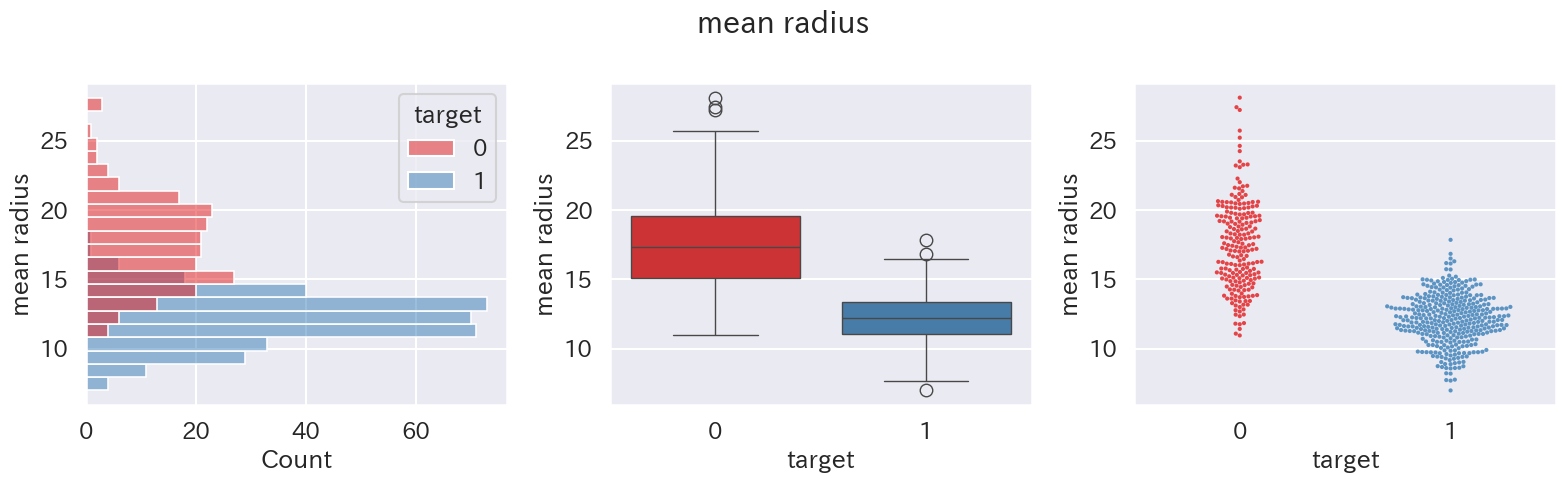

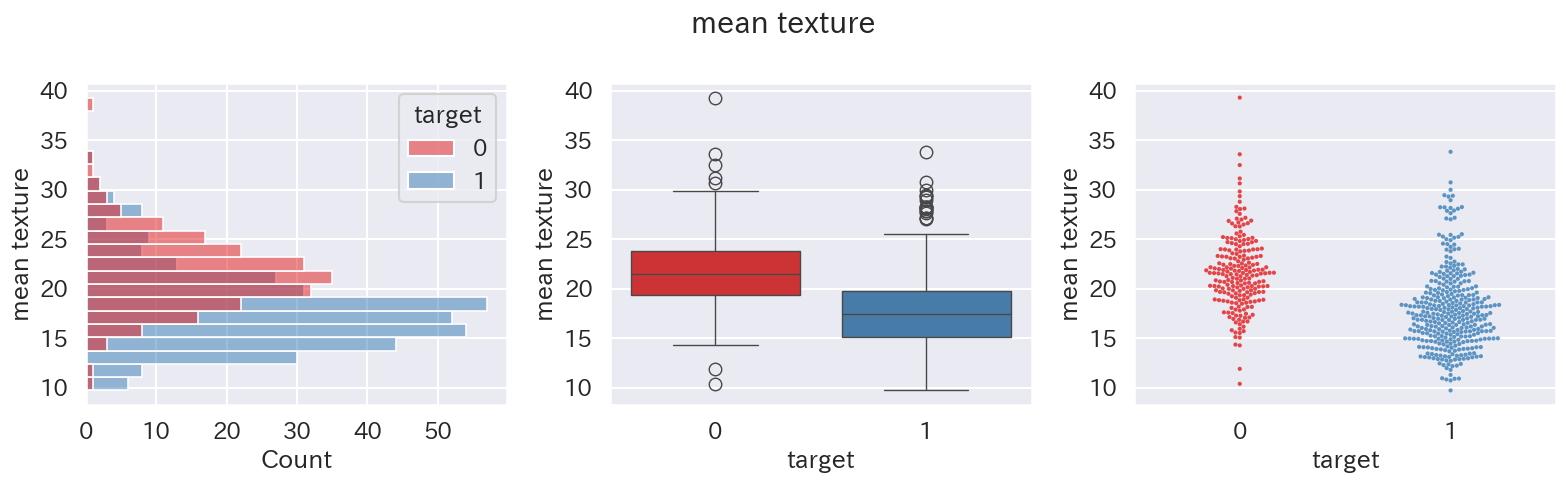

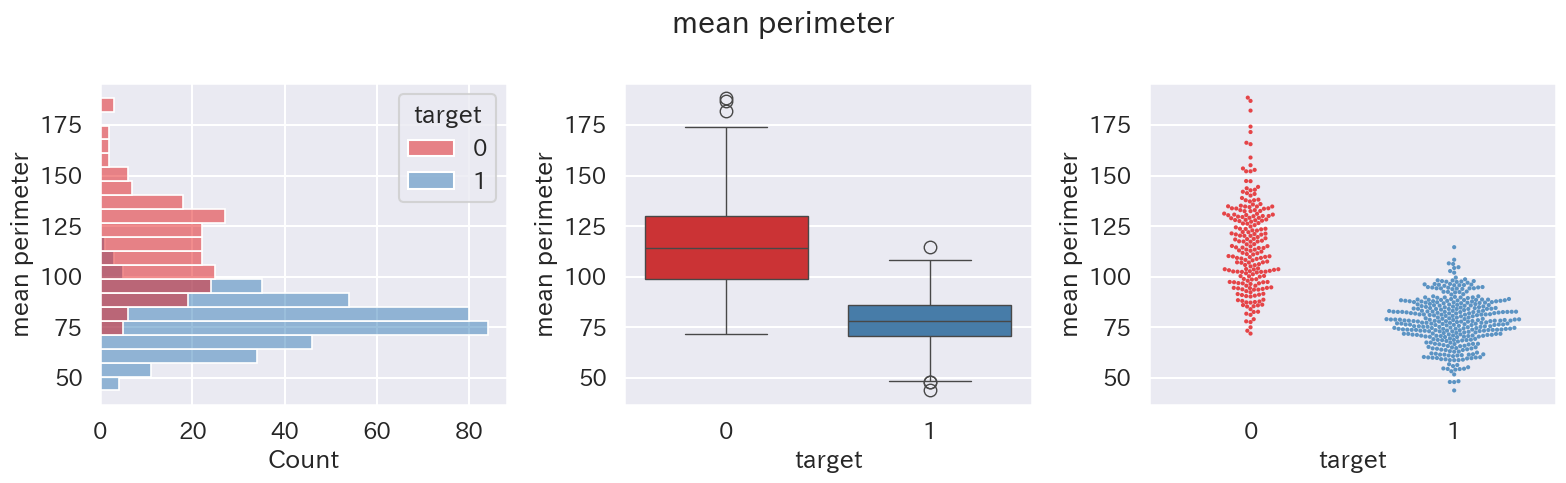

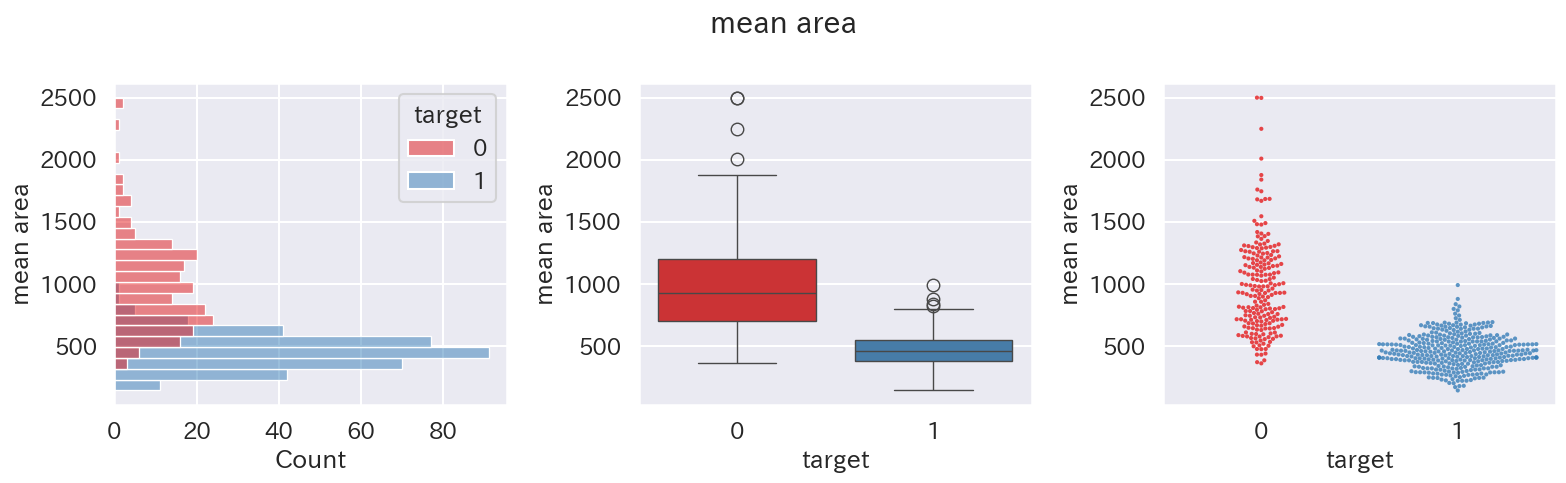

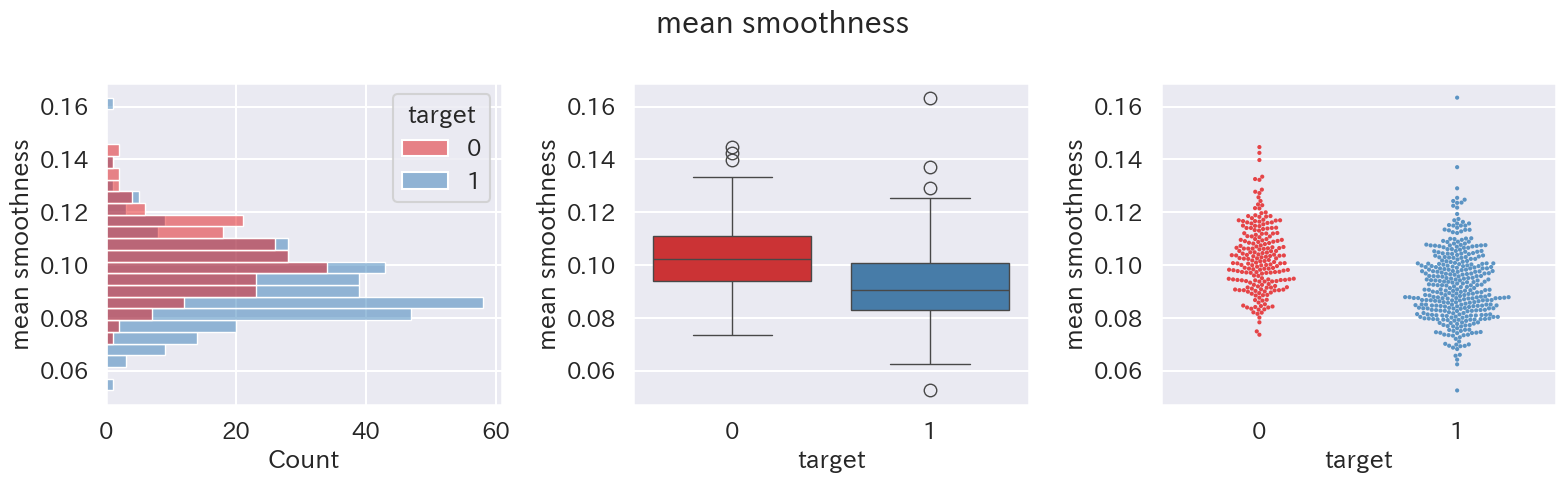

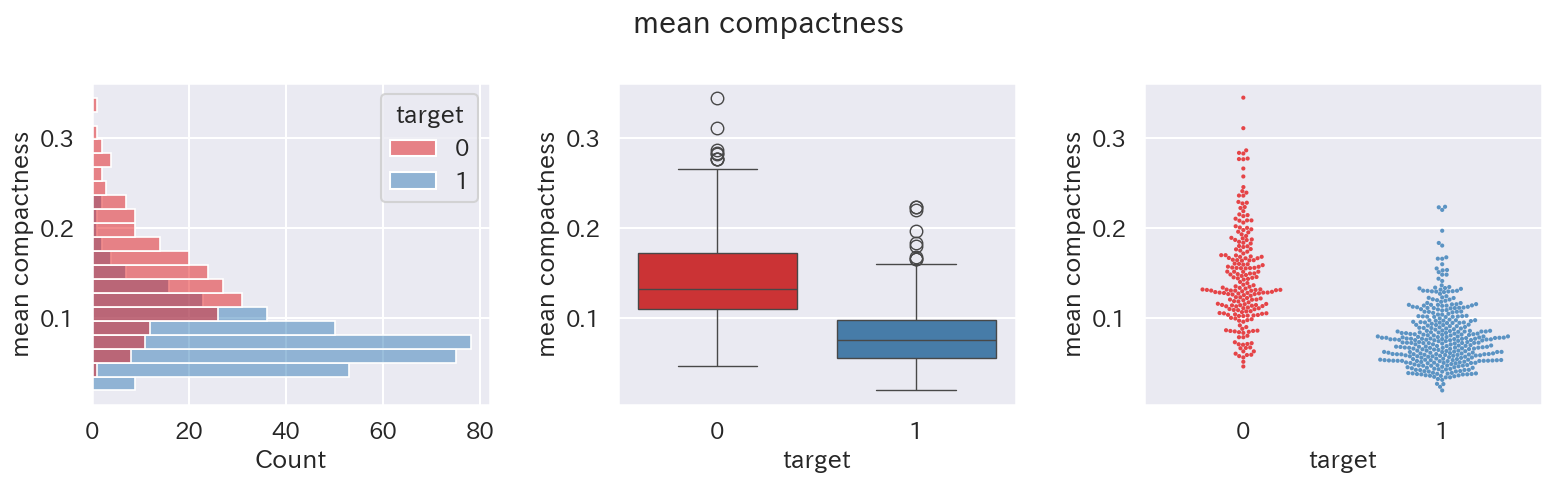

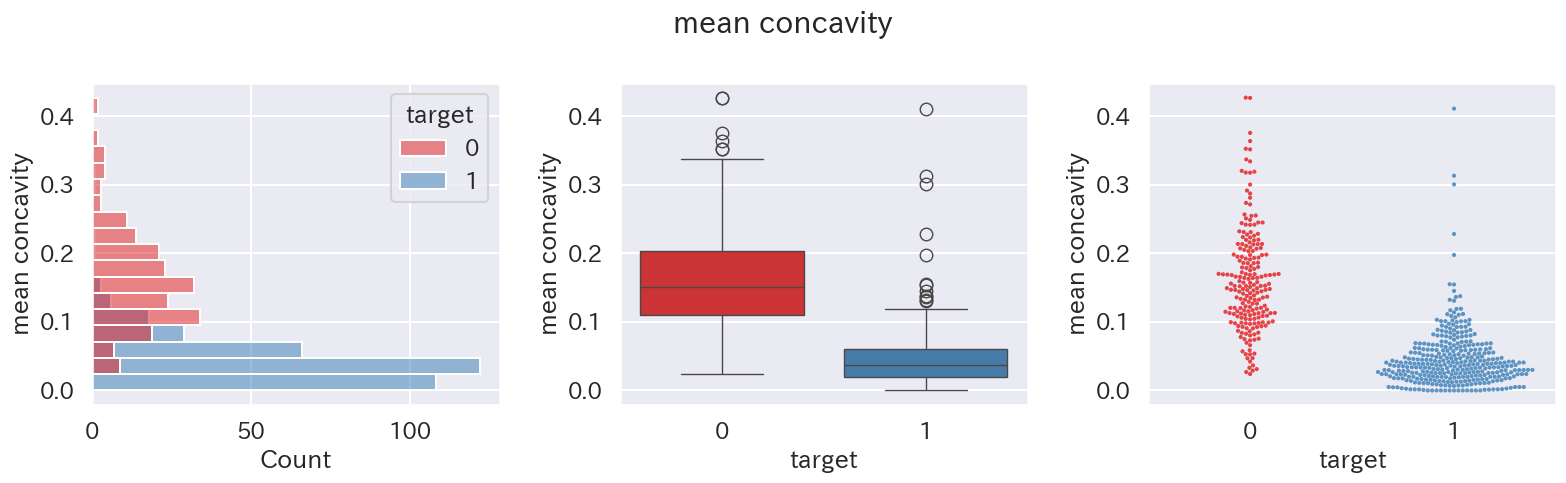

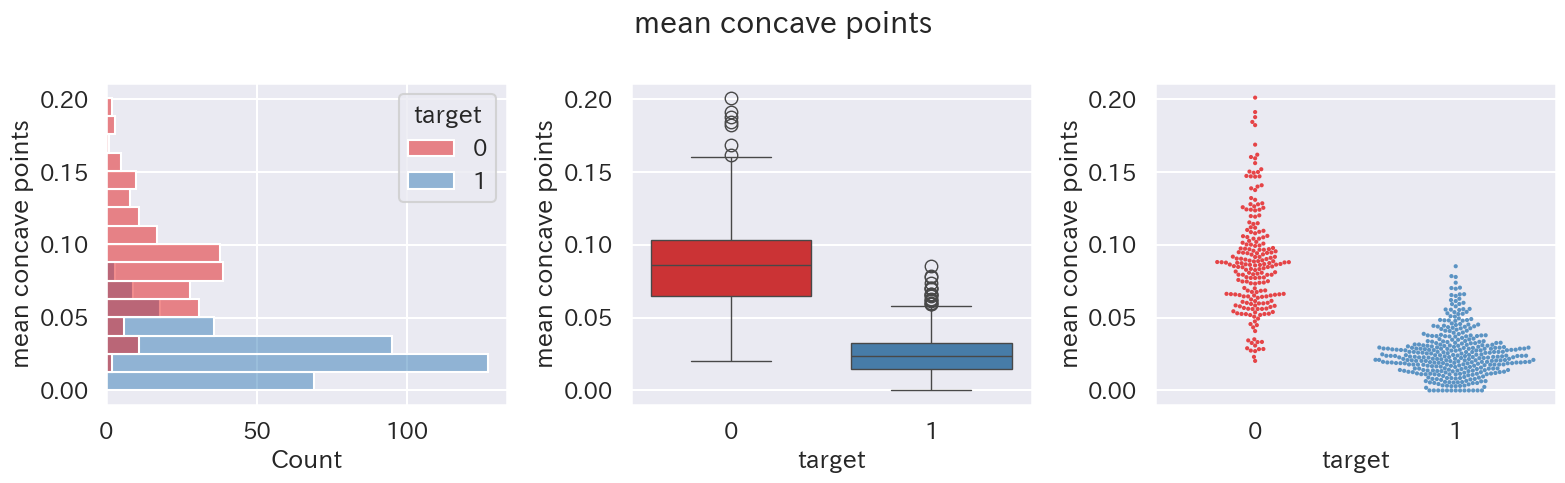

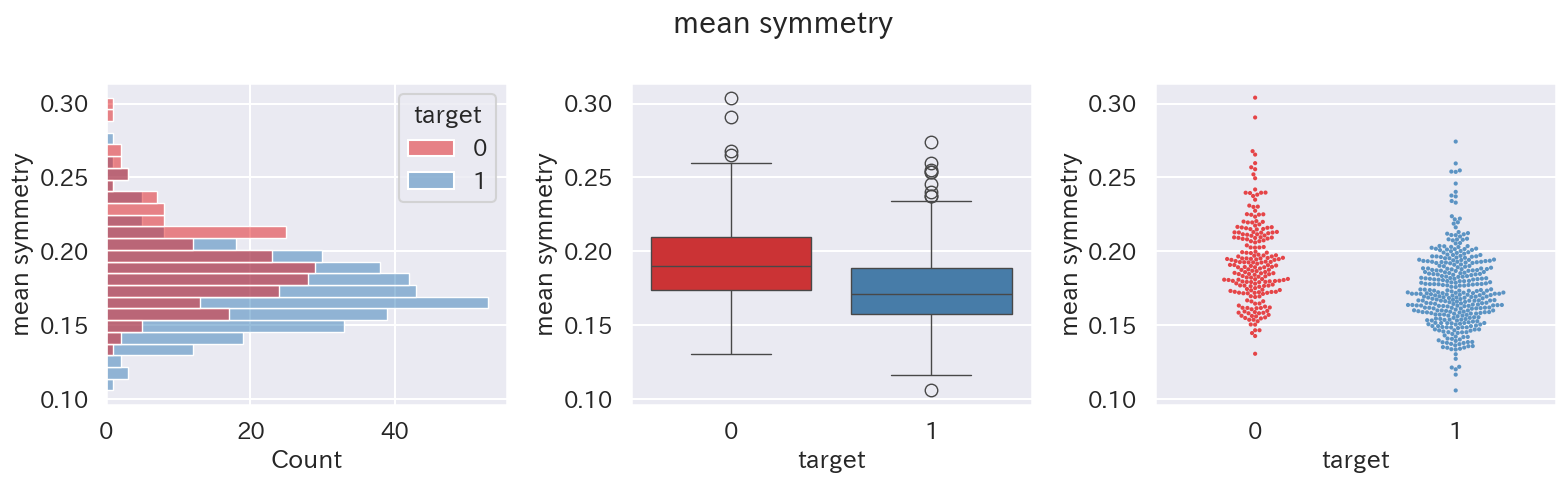

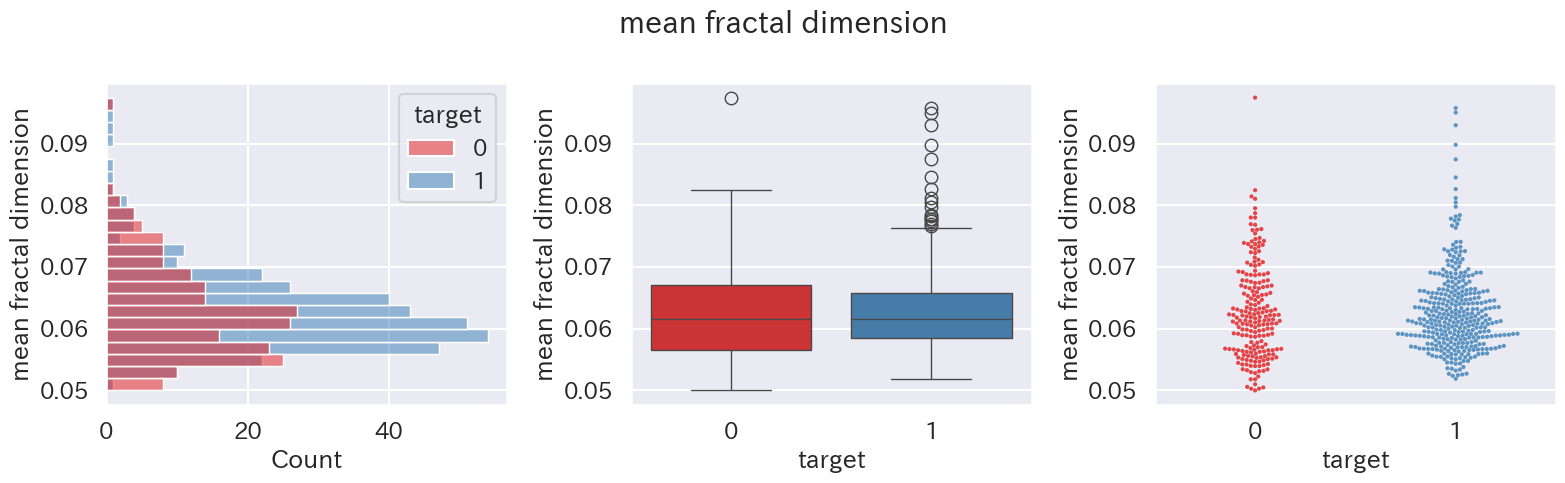

In [21]:
for feature in df.columns[:-1]:
	plot_data(feature)

スケーリング

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y , stratify=y, random_state=17, test_size=0.3)

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()

In [27]:
scaler.fit(X_train)

StandardScaler()

In [28]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled[:3]

array([[ 0.05480609,  0.76673987,  0.08887763, -0.0609116 ,  0.53473777,
         0.21382263,  0.72345191,  0.33694344,  0.42553833, -0.41713903],
       [-0.56784589, -0.07841876, -0.61160398, -0.58158578, -0.87754125,
        -0.8810564 , -1.02613   , -1.05349373, -0.93104311, -0.32606031],
       [-0.56502846, -1.34268344, -0.5637043 , -0.58186798,  0.97386164,
        -0.26845005, -0.64416926, -0.54118037, -0.55807463,  0.44672887]])

In [29]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled[:3]

array([[-0.28892034, -1.25006332, -0.36391761, -0.34086216, -0.90162224,
        -1.27339123, -1.0633302 , -1.04453114, -1.3040116 , -1.05745006],
       [-0.66927336, -0.02979319, -0.70699394, -0.65665316, -0.57440413,
        -0.98414195, -0.92124837, -0.97485421,  0.46210387, -0.21566185],
       [-0.62982935, -0.06915675, -0.65868486, -0.6304078 , -0.53403307,
        -0.67031219, -0.78434759, -0.91046021, -1.01148729, -0.31364048]])

In [30]:
# stratifyの確認
y_train.sum()/len(y_train), y_test.sum()/len(y_test)

(0.628140703517588, 0.6257309941520468)

---
<a id=2></a>
[Topへ](#0)

---
## 2. RandomForestClassifier

* モデルのインポート  
    https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* モデルインスタンスの作成
* モデルの構築・属性・予測・スコア
* 予想された確率
* confusion matrix（混同行列）
* precision（適合率）、 recall（再現率）、f1_score（F1値）
---

n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', bootstrap=True, random_state=None, max_samples=None

モデルのインポート

In [31]:
from sklearn.ensemble import RandomForestClassifier

モデルインスタンスの作成

In [32]:
rf_model = RandomForestClassifier(random_state=17)

モデルの構築・属性・予測・スコア

In [33]:
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=17)

In [34]:
rf_pred = rf_model.predict(X_test_scaled)

In [35]:
rf_pred[:5]

array([1, 1, 1, 0, 0])

In [36]:
np.round(rf_model.score(X_test_scaled, y_test), 4), np.round(rf_model.score(X_train_scaled, y_train), 4)

(0.9474, 1.0)

予想された確率

In [37]:
rf_model.predict_proba(X_test_scaled)[:5]

array([[0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.95, 0.05],
       [0.99, 0.01]])

confusion matrix（混同行列）

In [38]:
from sklearn.metrics import confusion_matrix, classification_report, recall_score, f1_score, precision_score

In [39]:
confusion_matrix(y_test, rf_pred)

array([[ 60,   4],
       [  5, 102]])

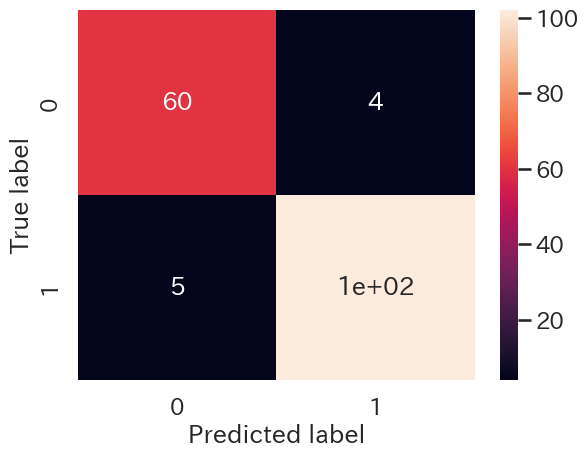

In [40]:
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [41]:
# score: 正解の数/全ての数
162/171

0.9473684210526315

In [42]:
rf_model.score(X_test_scaled, y_test)

0.9473684210526315

precision（適合率）、 recall（再現率）、f1_score（F1値）

In [43]:
print(classification_report(y_true=y_test, y_pred=rf_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93        64
           1       0.96      0.95      0.96       107

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171



In [44]:
# precision = 適合率
# 陰性/Negative/0 : 実際に0であって正く0と予測された数/0と予測した数
round(60/65, 2)

0.92

In [45]:
# precision = 適合率
# 陽性/Positive/1 : 実際に1であって正く1と予測された数/1と予測した数
round(102/106, 2)

0.96

In [46]:
# recall = 再現率
# 陰性/Negative/0 : 実際に0であって正く0と予測された数/実際に0である数
round(60/64, 2)

0.94

In [47]:
# recall = 再現率
# 陽性/Positive/1 : 実際に1であって正く1と予測された数/実際に0である数
round(102/107, 2)

0.95

In [82]:
# 調和平均　1/{(1/x + 1/y)/2}
# 2xy / (x + y)

In [48]:
pre = precision_score(y_test, rf_pred)
pre

0.9622641509433962

In [49]:
rec = recall_score(y_test, rf_pred)
rec

0.9532710280373832

In [50]:
f1_score(y_test, rf_pred)

0.9577464788732394

In [51]:
2*pre*rec / (pre+rec)

0.9577464788732395

In [52]:
rf_model_new = RandomForestClassifier(random_state=17)
rf_model_new.fit(X_train, y_train)
rf_pred_new = rf_model_new.predict(X_test)
print(classification_report(y_test, rf_pred_new))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93        64
           1       0.96      0.95      0.96       107

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171



---
<a id=3></a>
[Topへ](#0)

---
## 3. KNeighbors Classifier

* モデルのインポート  
    https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
* モデルインスタンスの作成
* モデルの構築・予測・スコア
* confusion matrix（混同行列）
---

n_neighbors=5, weights='uniform'

モデルのインポート

In [53]:
from sklearn.neighbors import KNeighborsClassifier

モデルインスタンスの作成

In [54]:
kn_model = KNeighborsClassifier(n_neighbors=5, weights='uniform')

モデルの構築・予測・スコア

In [55]:
kn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [56]:
kn_pred = kn_model.predict(X_test_scaled)
kn_pred[:5]

array([1, 1, 1, 0, 0])

confusion matrix（混同行列）

In [57]:
confusion_matrix(y_test, kn_pred)

array([[ 59,   5],
       [  1, 106]])

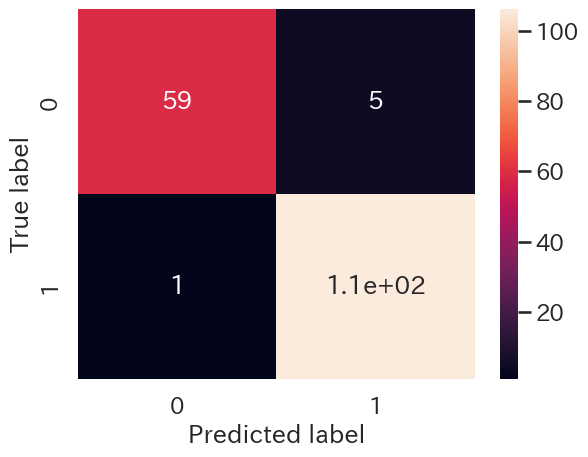

In [58]:
sns.heatmap(confusion_matrix(y_test, kn_pred), annot=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [59]:
print(classification_report(y_test, kn_pred))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95        64
           1       0.95      0.99      0.97       107

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



In [60]:
kn_model_new = KNeighborsClassifier()
kn_model_new.fit(X_train, y_train)
kn_pred_new = kn_model_new.predict(X_test)

In [61]:
confusion_matrix(y_test, kn_pred_new)

array([[ 52,  12],
       [  5, 102]])

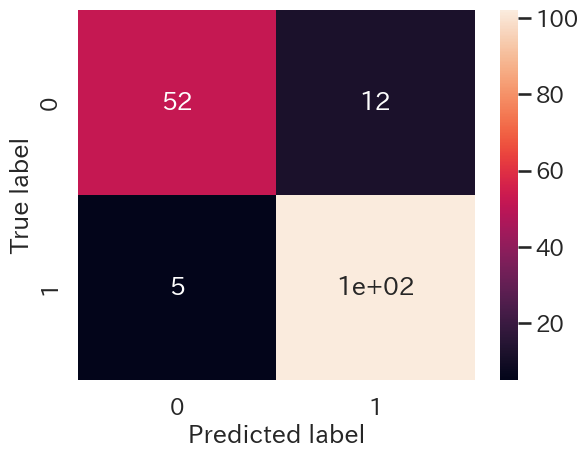

In [62]:
sns.heatmap(confusion_matrix(y_test, kn_pred_new), annot=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [63]:
print(classification_report(y_test, kn_pred_new))

              precision    recall  f1-score   support

           0       0.91      0.81      0.86        64
           1       0.89      0.95      0.92       107

    accuracy                           0.90       171
   macro avg       0.90      0.88      0.89       171
weighted avg       0.90      0.90      0.90       171



---
<a id=4></a>
[Topへ](#0)

---
## 4. SVC

* モデルのインポート  
    https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
* モデルインスタンスの作成
* モデルの構築・予測・スコア
* confusion matrix（混同行列）
---

C=1.0, gamma='scale', random_state=None

モデルのインポート

In [64]:
from sklearn.svm import SVC

モデルインスタンスの作成

In [65]:
svc_model = SVC()

モデルの構築・予測・スコア

In [66]:
svc_model.fit(X_train_scaled, y_train)

SVC()

In [67]:
svc_pred = svc_model.predict(X_test_scaled)
svc_pred[:5]

array([1, 1, 1, 0, 0])

In [68]:
svc_model.score(X_test_scaled, y_test)

0.9532163742690059

In [69]:
svc_model.score(X_train_scaled, y_train)

0.9597989949748744

confusion matrix（混同行列）

In [70]:
confusion_matrix(y_test, svc_pred)

array([[ 57,   7],
       [  1, 106]])

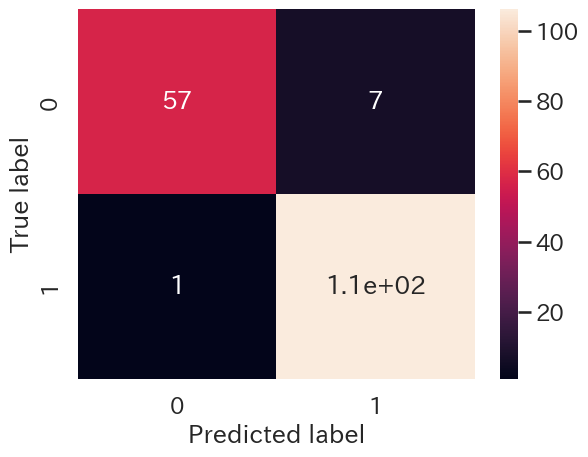

In [71]:
sns.heatmap(confusion_matrix(y_test, svc_pred), annot=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [72]:
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93        64
           1       0.94      0.99      0.96       107

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



In [73]:
svc_model_new = SVC()
svc_model_new.fit(X_train, y_train)
svc_pred_new = svc_model_new.predict(X_test)
print(classification_report(y_test, svc_pred_new))

              precision    recall  f1-score   support

           0       0.98      0.75      0.85        64
           1       0.87      0.99      0.93       107

    accuracy                           0.90       171
   macro avg       0.92      0.87      0.89       171
weighted avg       0.91      0.90      0.90       171



In [74]:
confusion_matrix(y_test, svc_pred_new)

array([[ 48,  16],
       [  1, 106]])

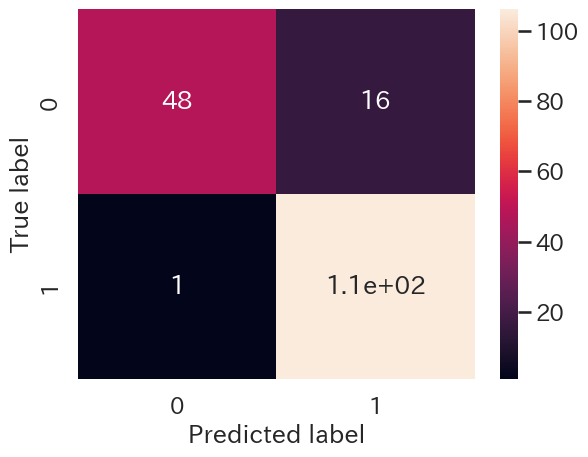

In [75]:
sns.heatmap(confusion_matrix(y_test, svc_pred_new), annot=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

---
<a id=5></a>
[Topへ](#0)

---
## 5. Logistic Regression

* モデルのインポート  
    https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
* モデルインスタンスの作成
* モデルの構築・予測・スコア
* confusion matrix（混同行列）
---

C=1.0, random_state=None, max_iter=100

モデルのインポート

In [76]:
from sklearn.linear_model import LogisticRegression

モデルインスタンスの作成

In [77]:
log_model = LogisticRegression()

モデルの構築・予測・スコア

In [78]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [79]:
log_pred = log_model.predict(X_test_scaled)
log_pred[:5]

array([1, 1, 1, 0, 0])

In [80]:
np.round(log_model.score(X_test_scaled, y_test), 4), np.round(log_model.score(X_train_scaled, y_train), 4)

(0.9532, 0.9372)

confusion matrix（混同行列）

In [81]:
confusion_matrix(y_test, log_pred)

array([[ 58,   6],
       [  2, 105]])

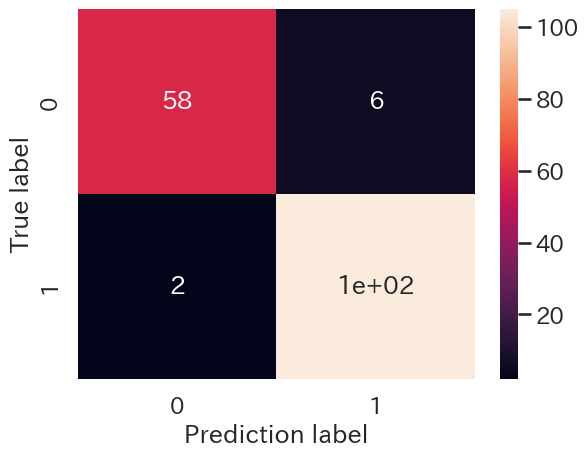

In [82]:
sns.heatmap(confusion_matrix(y_test, log_pred), annot=True)
plt.xlabel('Prediction label')
plt.ylabel('True label')
plt.show()

In [83]:
print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        64
           1       0.95      0.98      0.96       107

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



In [86]:
log_model_new = LogisticRegression()
log_model_new.fit(X_train, y_train)
log_pred_new = log_model_new.predict(X_test)
np.round(log_model_new.score(X_test, y_test), 4), np.round(log_model_new.score(X_train, y_train), 4)

(0.9532, 0.892)

In [85]:
confusion_matrix(y_test, log_pred_new)

array([[ 57,   7],
       [  1, 106]])

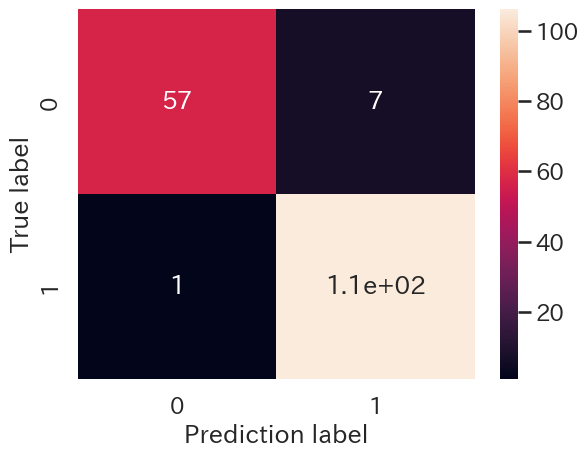

In [87]:
sns.heatmap(confusion_matrix(y_test, log_pred_new), annot=True)
plt.xlabel('Prediction label')
plt.ylabel('True label')
plt.show()

In [88]:
print(classification_report(y_test, log_pred_new))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93        64
           1       0.94      0.99      0.96       107

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



---
<a id=6></a>
[Topへ](#0)

---
## 6. モデルの評価

* precision_recall_curve  
    https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html  
* f1_score, precision, recall
* roc_curve  
    https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html  
    https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.htm  
---

In [89]:
model = SVC(probability=True)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.75      0.85        64
           1       0.87      0.99      0.93       107

    accuracy                           0.90       171
   macro avg       0.92      0.87      0.89       171
weighted avg       0.91      0.90      0.90       171



In [91]:
prob = model.predict_proba(X_test)
prob[:5]

array([[0.13704707, 0.86295293],
       [0.08149971, 0.91850029],
       [0.08363082, 0.91636918],
       [0.12987996, 0.87012004],
       [0.96377207, 0.03622793]])

precision_recall_curve

In [92]:
from sklearn.metrics import precision_recall_curve

In [96]:
precision, recall, threshold = precision_recall_curve(y_test, prob[:, 1])

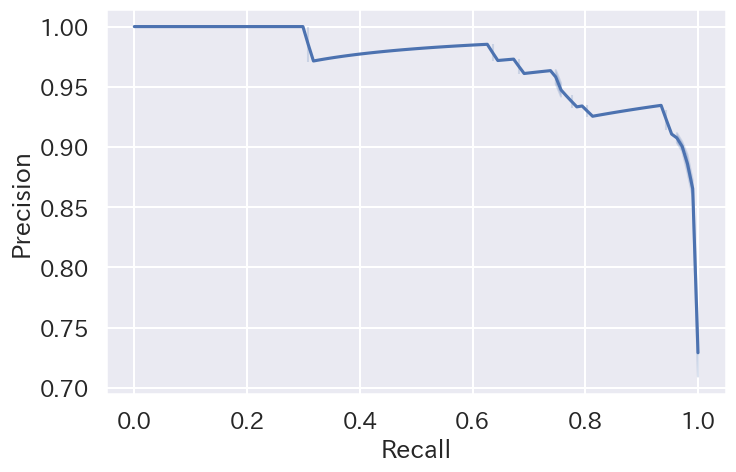

In [98]:
plt.figure(figsize=(8, 5))
sns.lineplot(x=recall, y=precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [99]:
len(precision), len(recall), len(threshold)

(172, 172, 171)

In [100]:
threshold

array([0.00381173, 0.00382475, 0.00388595, 0.00388869, 0.00397084,
       0.00425112, 0.00428289, 0.00436453, 0.00445951, 0.00447501,
       0.00451044, 0.00464607, 0.00525687, 0.00545271, 0.00579065,
       0.00618126, 0.00632052, 0.00652351, 0.00718977, 0.00764397,
       0.00839897, 0.00926802, 0.00932143, 0.00998856, 0.01281135,
       0.02026554, 0.02282314, 0.028797  , 0.03221438, 0.03339137,
       0.03461415, 0.03485642, 0.03622793, 0.04184651, 0.04389384,
       0.05400365, 0.05998987, 0.07230293, 0.08867913, 0.10335828,
       0.13906292, 0.18882843, 0.19815161, 0.20645265, 0.20968581,
       0.26861419, 0.35458256, 0.39528334, 0.39864656, 0.41040833,
       0.42349405, 0.43722804, 0.44251472, 0.46185682, 0.53890393,
       0.54914236, 0.55535058, 0.56067809, 0.56538494, 0.58532539,
       0.60217921, 0.61479053, 0.62978888, 0.63617605, 0.66367838,
       0.67244853, 0.68237001, 0.71698312, 0.73133146, 0.75210473,
       0.7576099 , 0.77598109, 0.78040211, 0.78095824, 0.79156

f1_score, precision, recall

In [102]:
f1_scores = []
for pre, rec in zip(precision, recall):
	f1_sc = 2*pre*rec/(pre+rec)
	f1_scores.append(f1_sc)

f1_scores[:5]

[0.7697841726618705,
 0.7725631768953068,
 0.7753623188405798,
 0.7781818181818182,
 0.781021897810219]

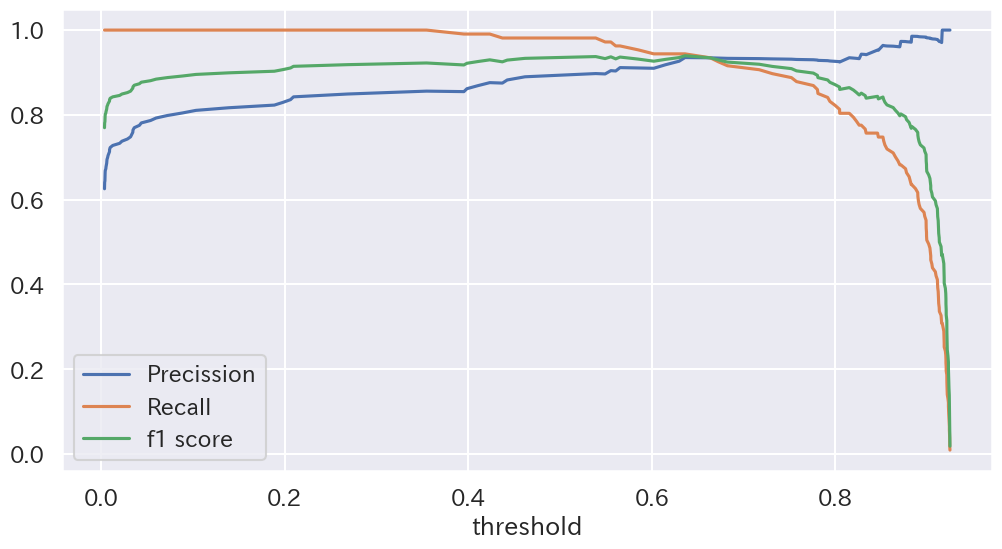

In [103]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=threshold, y=precision[:-1], label='Precission')
sns.lineplot(x=threshold, y=recall[:-1], label='Recall')
sns.lineplot(x=threshold, y=f1_scores[:-1], label='f1 score')
plt.xlabel('threshold')
plt.show()

In [104]:
np.max(f1_scores)

0.9395348837209302

In [105]:
# 最大値のインデックスを取得
np.argmax(f1_scores)

63

In [107]:
precision[63], recall[63], threshold[63]

(0.9351851851851852, 0.9439252336448598, 0.6361760537528097)

In [108]:
pred_new = np.where(prob[:, 1] >= threshold[63], 1, 0)
pred_new

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0])

In [109]:
f1_score(y_test, pred_new)

0.9395348837209302

roc_curve

In [112]:
import sklearn
sklearn.__version__

'1.5.1'

In [115]:
from sklearn.metrics import roc_curve

In [116]:
# 真陽性率(TPR)
# 全てのPositiveのうち、実際にPositiveだったものを正しくPositiveと判定した割合
# TPR = TP/(TP + FP)

# 偽陰性率(FPR)
# 全てのNegativeのうち、実際にNegativeだったものを正しくNegativeと判定した割合
# FPR = TN/(TN + FN)

# 適合性に似ている


# roc_curveを用いてfpr, tpr, thresholdの値を求める
fpr, tpr, threshold = roc_curve(y_test, prob[:, 1])

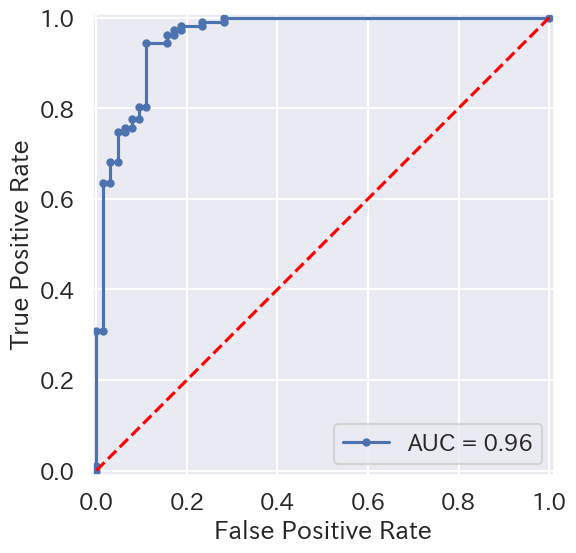

In [118]:
from sklearn.metrics import RocCurveDisplay, auc   # 代替のモジュール

fig, axes = plt.subplots(figsize=(16, 6))

display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc(fpr, tpr))
# fpr, tprはすでに取得済み
# roc_aucにはauc(area under curve、すでに計算済み)を指定する

display.plot(marker='o', markersize=5, ax=axes)

axes.set_xlabel('False Positive Rate')
axes.set_ylabel('True Positive Rate')
sns.lineplot(x=[0, 1], y=[0, 1], color='red', linestyle='--', ax=axes)

plt.show()

In [119]:
np.random.seed(17)
pos = np.random.randn(1000) + 1.5
neg = np.random.randn(1000) - 1.5
neg2 = np.random.randn(1000) - 7
neg3 = np.random.randn(900) + 1.5

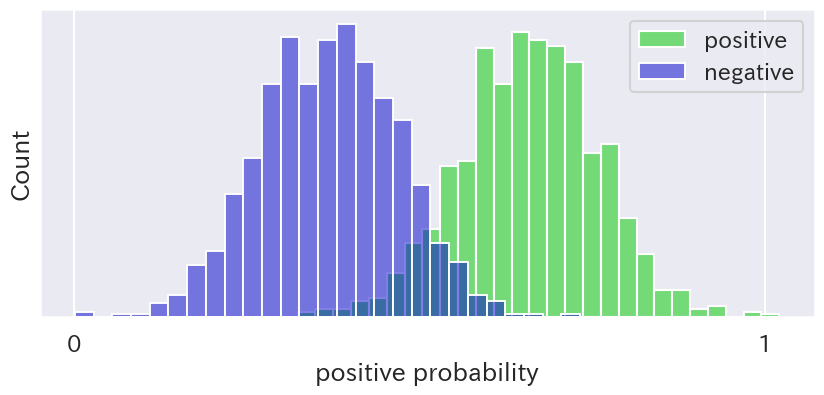

In [120]:
# あるモデルによりポジティブである確率を求めた
# 中央付近では確率が高くても実際にはネガティブ、低くてもポジティブなものが混在する
plt.figure(figsize=(10, 4))
sns.histplot(pos, color='#0c0', alpha=0.5, label='positive')
sns.histplot(neg, color='#00c', alpha=0.5, label='negative')
plt.legend()
plt.xticks([-5.2, 5], [0, 1])
plt.yticks([], [])
plt.xlabel('positive probability')
plt.show()
# 閾値を中央付近にあると、バーの重なる部分が FP, FN になる

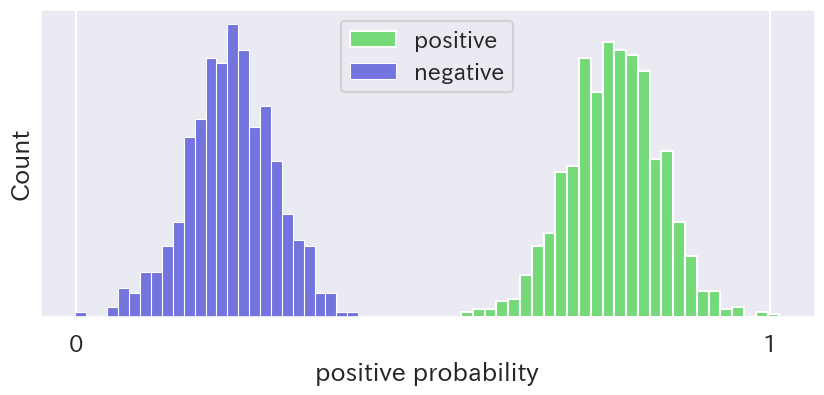

In [121]:
# このモデルでは100％の精度で分離することができている
plt.figure(figsize=(10, 4))
sns.histplot(pos, color='#0c0', alpha=0.5, label='positive')
sns.histplot(neg2, color='#00c', alpha=0.5, label='negative')
plt.legend()
plt.xticks([-10.5, 5], [0, 1])
plt.yticks([], [])
plt.xlabel('positive probability')
plt.show()
# ある閾値でははっきりと0：1に分かれる

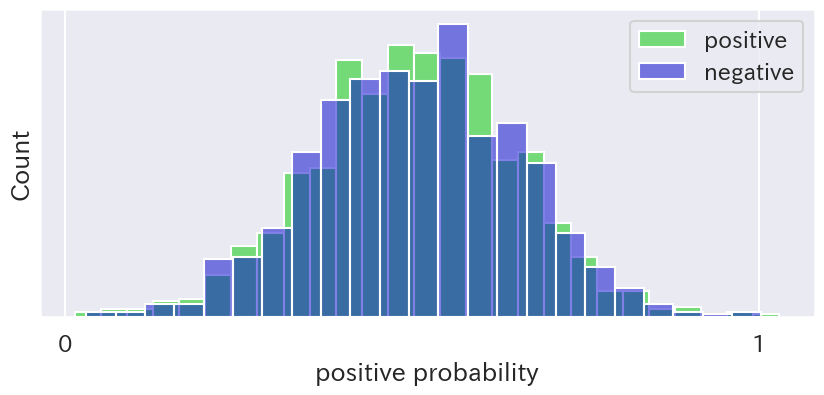

In [122]:
## ランダム（無作為）な確率をそれぞれに与える場合、どの確率においてもポジティブ、ネガティブの割合は一定
plt.figure(figsize=(10, 4))
sns.histplot(pos, color='#0c0', alpha=0.5, label='positive')
sns.histplot(neg3, color='#00c', alpha=0.5, label='negative')
plt.legend()
plt.xticks([-2, 5], [0, 1])
plt.yticks([], [])
plt.xlabel('positive probability')
plt.show()
# 閾値を下げていくとTPRが上がり、同じ割合でFPRも上がっていく
# 結果として直線になると考えることができる

In [123]:
def calcurate_metrics(np, nn, tp, tn):
    fp = np - tp
    fn = nn - tn
    fpr = fp / (tn + fp)
    tpr = tp / (tp + fn)
    pre = tp / (tp + fp)
    rec = tp / (tp + fn)
    f1 = 2 * pre * rec / (pre + rec)
    print(f'FPR : {fpr},  TPR : {tpr}')
    print(f'PRE : {pre},  REC : {rec}')

In [124]:
calcurate_metrics(1000, 1000, 900, 600)

FPR : 0.14285714285714285,  TPR : 0.6923076923076923
PRE : 0.9,  REC : 0.6923076923076923


In [125]:
calcurate_metrics(100, 10000, 80, 9990)

FPR : 0.001998001998001998,  TPR : 0.8888888888888888
PRE : 0.8,  REC : 0.8888888888888888


In [126]:
# fpr = fp / (tn + fp)
# tpr = tp / (tp + fn)
fpr, tpr, thresholds = roc_curve(y_test, prob[:, 1])
fpr, tpr, thresholds

(array([0.      , 0.      , 0.      , 0.015625, 0.015625, 0.03125 ,
        0.03125 , 0.046875, 0.046875, 0.0625  , 0.0625  , 0.078125,
        0.078125, 0.09375 , 0.09375 , 0.109375, 0.109375, 0.15625 ,
        0.15625 , 0.171875, 0.171875, 0.1875  , 0.1875  , 0.234375,
        0.234375, 0.28125 , 0.28125 , 1.      ]),
 array([0.        , 0.00934579, 0.30841121, 0.30841121, 0.63551402,
        0.63551402, 0.68224299, 0.68224299, 0.74766355, 0.74766355,
        0.75700935, 0.75700935, 0.77570093, 0.77570093, 0.80373832,
        0.80373832, 0.94392523, 0.94392523, 0.96261682, 0.96261682,
        0.97196262, 0.97196262, 0.98130841, 0.98130841, 0.99065421,
        0.99065421, 1.        , 1.        ]),
 array([       inf, 0.92477575, 0.91636918, 0.91572078, 0.88315382,
        0.88258824, 0.8712351 , 0.87012004, 0.85177367, 0.84675406,
        0.84590238, 0.83344875, 0.8281767 , 0.82589641, 0.81510673,
        0.80464527, 0.63617605, 0.60217921, 0.56538494, 0.56067809,
        0.55535058, 

---
 <a id=4></a>
[Topへ](#0)

---
## 以上
    
---